In [3]:
from pandas import DataFrame

df = DataFrame(range(10), columns=['x'])
df

df['y'] = range(10,20)
df

,x,y
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn


In [8]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts

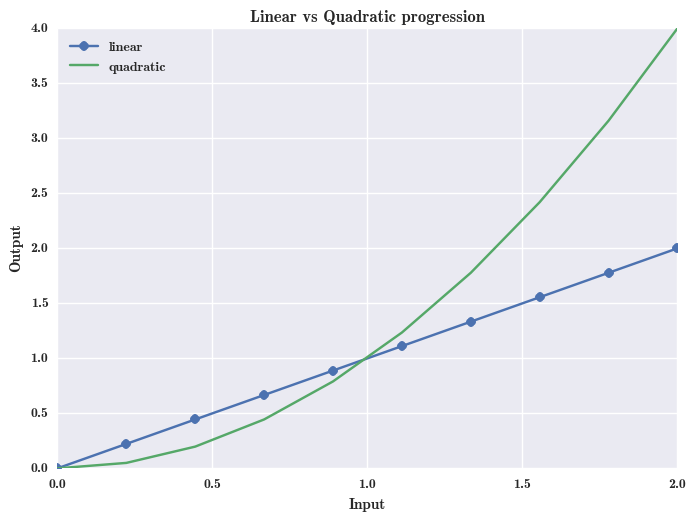

In [9]:
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');
plt.show()

In [10]:
type(sc)

pyspark.context.SparkContext

In [11]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import requests
# requests.packages.urllib3.disable_warnings()

AttributeError: 'module' object has no attribute 'packages'

In [13]:
btd = sqlContext.jsonFile("/vagrant/btd2.json")

In [14]:
print(type(btd))

<class 'pyspark.sql.dataframe.DataFrame'>


In [15]:
btd.printSchema()

root
 |-- Bike #: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- End Station: string (nullable = true)
 |-- End Terminal: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- Start Station: string (nullable = true)
 |-- Start Terminal: string (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Trip ID: string (nullable = true)
 |-- Zip Code: string (nullable = true)



In [16]:
btd.take(3)

[Row(Bike #=u'520', Duration=u'63', End Date=u'8/29/13 14:14', End Station=u'South Van Ness at Market', End Terminal=u'66', Start Date=u'8/29/13 14:13', Start Station=u'South Van Ness at Market', Start Terminal=u'66', Subscription Type=u'Subscriber', Trip ID=u'4576', Zip Code=u'94127'),
 Row(Bike #=u'661', Duration=u'70', End Date=u'8/29/13 14:43', End Station=u'San Jose City Hall', End Terminal=u'10', Start Date=u'8/29/13 14:42', Start Station=u'San Jose City Hall', Start Terminal=u'10', Subscription Type=u'Subscriber', Trip ID=u'4607', Zip Code=u'95138'),
 Row(Bike #=u'48', Duration=u'71', End Date=u'8/29/13 10:17', End Station=u'Mountain View City Hall', End Terminal=u'27', Start Date=u'8/29/13 10:16', Start Station=u'Mountain View City Hall', Start Terminal=u'27', Subscription Type=u'Subscriber', Trip ID=u'4130', Zip Code=u'97214')]

In [17]:
sqlCtx.registerDataFrameAsTable(btd, "bay_area_bike")

In [18]:
df2 = sqlCtx.sql("SELECT Duration as d1 from bay_area_bike where Duration < 7200")

In [19]:
data = Data([Histogram(x=df2.toPandas()['d1'])])

In [21]:
py.sign_in('hawkphil', '9vglacrmua')

py.iplot(data, filename="spark/less_2_hour_rides")

In [22]:
df3 = sqlCtx.sql("SELECT Duration as d1 from bay_area_bike where Duration < 2000")

In [23]:
s1 = df2.sample(False, 0.05, 20)
s2 = df3.sample(False, 0.05, 2500)

In [26]:
data = Data([
        Histogram(x=s1.toPandas()['d1'], name="Large Sample"),
        Histogram(x=s2.toPandas()['d1'], name="Small Sample")
    ])

In [27]:
py.iplot(data, filename="spark/sample_rides")

In [28]:
import plotly.tools as tls
tls.embed("https://plot.ly/~bill_chambers/101")

In [29]:
dep_stations = btd.groupBy(btd['Start Station']).count().toPandas().sort('count', ascending=False)
dep_stations

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Start Station,count
34,San Francisco Caltrain (Townsend at 4th),9838
47,Harry Bridges Plaza (Ferry Building),7343
0,Embarcadero at Sansome,6545
52,Market at Sansome,5922
62,Temporary Transbay Terminal (Howard at Beale),5113
32,Market at 4th,5030
66,2nd at Townsend,4987
61,San Francisco Caltrain 2 (330 Townsend),4976
25,Steuart at Market,4913
21,Townsend at 7th,4493


In [30]:
dep_stations['Start Station'][:3] # top 3 stations

34    San Francisco Caltrain (Townsend at 4th)
47        Harry Bridges Plaza (Ferry Building)
0                       Embarcadero at Sansome
Name: Start Station, dtype: object

In [31]:
def transform_df(df):
    df['counts'] = 1
    df['Start Date'] = df['Start Date'].apply(pd.to_datetime)
    return df.set_index('Start Date').resample('D', how='sum')

In [32]:
pop_stations = [] # being popular stations - we could easily extend this to more stations
for station in dep_stations['Start Station'][:3]:
    temp = transform_df(btd.where(btd['Start Station'] == station).select("Start Date").toPandas())
    pop_stations.append(
        Scatter(
        x=temp.index,
        y=temp.counts,
        name=station
        )
    )

In [33]:
data = Data(pop_stations)
py.iplot(data, filename="spark/over_time")